<a href="https://colab.research.google.com/github/cLanton-TH/SW_application_project/blob/master/lstm_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Word2Vec, Lstm을 이용한 전처리 및 임베딩 모델화 작업**

---



---



# Preprocessing

In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 16.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7c7e5e76dba0>)

In [4]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
print(len(train_data))

150000


In [7]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

print(test_data.isnull().values.any())

True
True


In [8]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
test_data = test_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(test_data.isnull().values.any()) # Null 값이 존재하는지 확인

False
False


In [9]:
print(len(train_data)) # 리뷰 개수 출력

149995


In [10]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-10-03fc1a04d8ac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-10-03fc1a04d8ac>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [11]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


# Tokenizing data

In [12]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [14]:
X_test = []
for sentence in test_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [15]:
print(tokenized_data[:5]) # 상위 5개 출력
print(train_data.document[:5])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']]
0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object


# Word2Vec Imbedding

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [17]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(14254, 100)

In [18]:
print(model.wv.most_similar("재밌다"))

[('재미있다', 0.930962085723877), ('재다', 0.8959433436393738), ('괜찮다', 0.6013033986091614), ('흥미진진', 0.5835083723068237), ('웃기다', 0.582671582698822), ('재밋', 0.5777512788772583), ('실망하다', 0.5751343965530396), ('꿀잼', 0.5562543272972107), ('재밋음', 0.5556595325469971), ('재밋다', 0.5438668131828308)]


In [19]:
model.save("word2vec.model")

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_data)

In [21]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24328
단어 집합에서 희귀 단어의 비율: 55.604315231303715
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8637396855052155


In [22]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 19425


In [23]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(tokenized_data)
X_train = tokenizer.texts_to_sequences(tokenized_data)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
print(X_train[:3])

[[50, 457, 16, 260, 660], [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19], [386, 2452, 2319, 5676, 2, 221, 9]]


In [25]:
import numpy as np

y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [26]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]


In [27]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

148509
148509


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.610959605141776


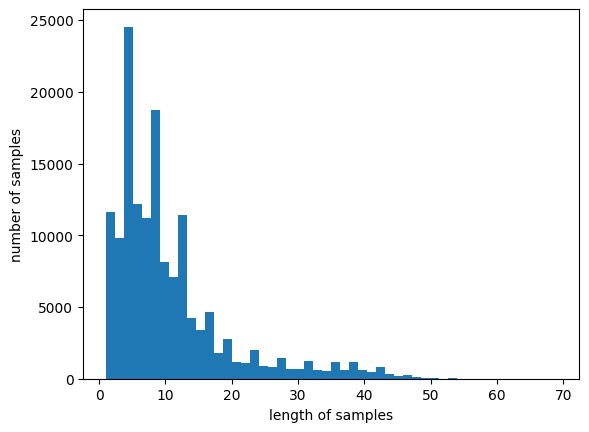

In [28]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [30]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.44612784410373


In [31]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [32]:
# 토큰화된 텍스트 데이터를 가지고 Tokenizer 객체 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_data)  # texts는 토큰화된 데이터가 담긴 리스트

# 어휘 크기 확인
vocab_size = len(tokenizer.word_index)
print(f"어휘 크기: {vocab_size}")

어휘 크기: 43752


# LSTM Process

In [33]:
#lstm process

import tensorflow as tf
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint


'''model = Sequential()
model.add(Embedding(input_dim= 43752, output_dim= 100))
model.add(LSTM(128))  # LSTM 레이어
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력 레이어

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])'''

embedding_dim = 100
hidden_units = 128
vocab_size = 43752

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/15
1857/1857 [==============================] - ETA: 0s - loss: 0.4061 - acc: 0.8132
Epoch 1: val_acc improved from -inf to 0.83675, saving model to best_model.h5
1857/1857 [==============================] - 230s 122ms/step - loss: 0.4061 - acc: 0.8132 - val_loss: 0.3710 - val_acc: 0.8367
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1857/1857 [==============================] - ETA: 0s - loss: 0.3439 - acc: 0.8508
Epoch 2: val_acc improved from 0.83675 to 0.84668, saving model to best_model.h5
1857/1857 [==============================] - 213s 115ms/step - loss: 0.3439 - acc: 0.8508 - val_loss: 0.3491 - val_acc: 0.8467
Epoch 3/15
1857/1857 [==============================] - ETA: 0s - loss: 0.3167 - acc: 0.8651
Epoch 3: val_acc improved from 0.84668 to 0.85439, saving model to best_model.h5
1857/1857 [==============================] - 220s 119ms/step - loss: 0.3167 - acc: 0.8651 - val_loss: 0.3356 - val_acc: 0.8544
Epoch 4/15
1857/1857 [==============================] - ETA: 0s - loss: 0.2937 - acc: 0.8779
Epoch 4: val_acc improved from 0.85439 to 0.85903, saving model to best_model.h5
1857/1857 [==============================] - 222s 119ms/step - loss: 0.2937 - acc: 0.8779 - val_loss: 0.3270 - val_acc: 0.8590
Epoch 5/15
1857/1857 [==============================] - ETA: 0s - loss: 0.2738 - acc: 0.8891
Epoch 5: val_ac

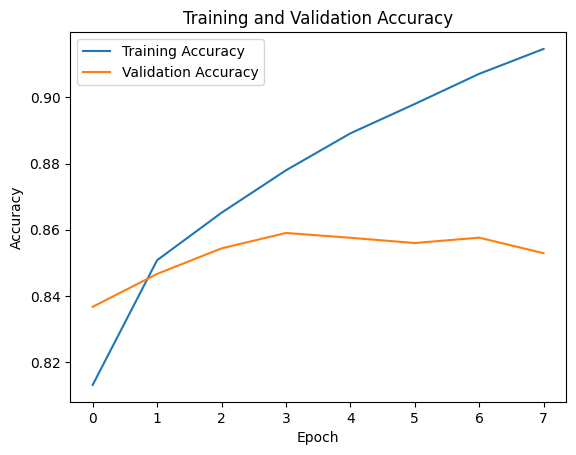

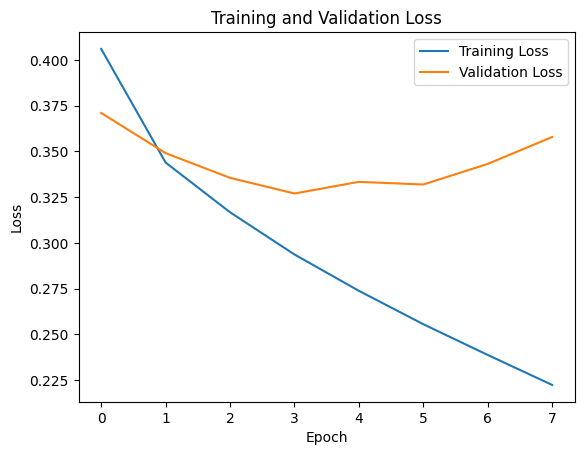

In [34]:
import matplotlib.pyplot as plt

# 모델 훈련 시 history 객체를 반환하므로, history에서 정확도와 손실을 추출
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 그래프
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# 손실 그래프
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
loaded_model = load_model('best_model.h5')

# 테스트 데이터 입력

In [36]:
from keras.preprocessing.sequence import pad_sequences
import re

y_pred = [] #모델의 예측값
y_real = [] #실제 레이블

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    #print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    return 1
  else:
    #print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    return 0

for i in range(0, 10000):
  if i == 5746:
    continue;
  if i == 7899:
    continue;
  y_pred.append(sentiment_predict(test_data.document[i]))
  y_real.append(test_data.label[i])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 34ms/step


In [39]:
for i in range(10000, 20000):
  y_pred.append(sentiment_predict(test_data.document[i]))
  y_real.append(test_data.label[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 40ms/step


In [40]:
for i in range(20000, 30000):
  if i == 27097:
    continue;
  y_pred.append(sentiment_predict(test_data.document[i]))
  y_real.append(test_data.label[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 39ms/step


In [ ]:
for i in range(30000, 40000):
  y_pred.append(sentiment_predict(test_data.document[i]))
  y_real.append(test_data.label[i])

In [ ]:
for i in range(40000, len(test_data.label)):#(len(test_data.label)): #len(X_test):
  y_pred.append(sentiment_predict(test_data.document[i]))
  y_real.append(test_data.label[i])

In [41]:
print(len(y_real), len(y_pred))

29997 29997


# 평가 결과값 산출

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 정확도 (Accuracy) 계산
accuracy = accuracy_score(y_real, y_pred)
print("정확도(Accuracy):", accuracy)

# 정밀도 (Precision) 계산
precision = precision_score(y_real, y_pred)
print("정밀도(Precision):", precision)

# 재현율 (Recall) 계산
recall = recall_score(y_real, y_pred)
print("재현율(Recall):", recall)

# F1 점수 (F1 Score) 계산
f1 = f1_score(y_real, y_pred)
print("F1 Score:", f1)

정확도(Accuracy): 0.85001833516685
정밀도(Precision): 0.859589506592361
재현율(Recall): 0.838671175651482
F1 Score: 0.8490015103205235
